## Part One
The objective of this block of code is to group the cluster populous city in each state by
factors that make them appealing to Electic Vehicle owners. 

The blog post accompaning this project explains more

In [952]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [953]:
#import geographic data of all EV chargers in the US with LAT and LNG coordinates

df1 = pd.read_csv("C:/Users/Trevor/Desktop/Test_3.csv")
df1.head()

T:\Programs\Anaconda_II\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,31,39,45,46,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,nan,213-741-1151,E,nan,Public,24 hours daily; pay lot,NaN,nan,nan,nan,nan,12.000000,nan,NaN,Non-Networked,NaN,GPS,34.040539,-118.271387,2020-11-09,1523,2020-11-09 16:53:32 UTC,P,nan,NaN,1995-08-30,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PARKING_GARAGE,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
1,ELEC,Cherokee & Hollywood Parking Garage,1718 N Cherokee Ave,NaN,Los Angeles,CA,90028,nan,213-550-9904,E,nan,Public,24 hours daily; pay lot,NaN,nan,nan,nan,nan,4.000000,nan,NaN,Non-Networked,NaN,200-8,34.102404,-118.334758,2019-05-09,1526,2020-01-21 18:34:38 UTC,P,nan,NaN,1995-08-15,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PARKING_GARAGE,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
2,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,nan,626-575-6800,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,4.000000,nan,NaN,Non-Networked,NaN,GPS,34.068720,-118.064000,2019-09-09,1583,2020-01-21 18:34:38 UTC,SG,nan,NaN,1996-10-15,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,STATE_GOV,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
3,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,nan,858-554-9100,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,1.000000,nan,NaN,Non-Networked,NaN,GPS,32.899470,-117.243000,2019-12-12,6355,2020-01-21 18:34:38 UTC,P,nan,NaN,1997-07-30,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,HOSPITAL,nan,nan,nan,nan,nan,nan,Pay to Park,NaN,nan,nan,nan,nan,nan,nan,nan,NaN
4,ELEC,San Diego Wild Animal Park,15500 San Pasqual Valley Rd,NaN,Escondido,CA,92027,nan,760-747-8702,E,nan,Public,24 hours daily,NaN,nan,nan,nan,nan,2.000000,nan,NaN,Non-Networked,NaN,200-9,33.098589,-117.004433,2019-02-06,6384,2020-01-21 18:34:38 UTC,P,nan,NaN,2014-09-02,nan,nan,nan,nan,J1772,US,NaN,NaN,nan,Public,nan,public,NaN,NaN,PAY_LOT,nan,nan,nan,nan,nan,nan,Free,NaN,nan,nan,nan,nan,nan,nan,nan,NaN


In [1340]:
# groupby city and get the count of chargers in that city
df2 = df1.groupby(['City']).count()
df2.drop(['Fuel Type Code', 'Station Name'], axis = 1, inplace = True)
df2.head()

,Street Address,Intersection Directions,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100 fifth Ave,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
70 Mile House,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
ANTHEM,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Abbotsford,27,10,27,27,0,27,27,0,27,27,1,0,0,0,2,22,5,0,27,22,27,27,27,27,27,27,7,0,0,7,0,0,0,0,27,27,0,14,0,27,0,27,0,0,6,0,0,0,0,0,0,19,6,0,0,0,0,0,0,0,0
Aberdeen,11,1,11,11,0,11,11,0,11,11,0,0,0,0,0,9,4,0,11,8,11,11,11,11,11,11,6,0,0,6,0,0,0,0,11,11,0,0,0,11,0,11,2,0,4,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0


In [1341]:
#drop unnessecary columns
df2.drop(['Street Address','Intersection Directions', 'ZIP','Plus4','Station Phone', 'Status Code', 
         'Expected Date', 'Groups With Access Code', 'Access Days Time', 'Cards Accepted','BD Blends',
         'NG Fill Type Code','NG PSI','EV Level1 EVSE Num',
         'EV Level2 EVSE Num','EV DC Fast Count', 'EV Other Info', 'EV Network',
          'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude','Date Last Confirmed','ID','Updated At',
          'Owner Type Code','Federal Agency ID','Federal Agency Name','Open Date','Hydrogen Status Link',
          'NG Vehicle Class','LPG Primary','E85 Blender Pump','EV Connector Types','Country','Intersection Directions (French)',
          'Access Days Time (French)','BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail',
          'Access Code','Access Detail Code','Federal Agency Code','Facility Type','CNG Dispenser Num',
          'CNG On-Site Renewable Source','CNG Total Compression Capacity','CNG Storage Capacity',
          'LNG On-Site Renewable Source','E85 Other Ethanol Blends','EV Pricing',
          'EV Pricing (French)','LPG Nozzle Types','Hydrogen Pressures',
          'Hydrogen Standards','CNG Fill Type Code','CNG PSI','CNG Vehicle Class',
          'LNG Vehicle Class','EV On-Site Renewable Source'], axis = 1, inplace = True)

In [1342]:
# scrape the web for data on the populous cities in the each US state
# and add to new data frame
df=pd.read_html("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")[0]

#sort by postal code to append later data frame easier
df.sort_values(['State, federaldistrict, or territory'])
df.head()

,"State, federaldistrict, or territory","State, federal district,or territory population[5]",Most populous,City population,2nd most populous,3rd most populous,4th most populous,5th most populous,Capital (if nototherwise listed)
0,Alabama,4887871,Birmingham,209880,"Huntsville (204,189)","Montgomery (198,956)","Mobile (189,572)","Tuscaloosa (101,113) [6]",NaN
1,Alaska,737438,Anchorage,291538,"Juneau (32,113)","Fairbanks (31,516)","Wasilla (10,529)","Sitka (8,647)",NaN
2,American Samoa,"55,519[7]",Tafuna,"7,945[8]","Nu'uuli (3,955)","Pago Pago (3,656)","'Ili'ili (3,195)","Pava'ia'i (2,450)",[note 1]
3,Arizona,7171646,Phoenix,1660272,"Tucson (545,975)","Mesa (508,958)","Chandler (257,165)","Scottsdale (255,310)",NaN
4,Arkansas,3013825,Little Rock,197881,"Fort Smith (87,845)","Fayetteville (86,751)","Springdale (81,029)","Jonesboro (76,990)",NaN


In [1343]:
# again, drop unneeded columns
df.drop(['State, federal district,or territory population[5]', '2nd most populous', '3rd most populous', '4th most populous','5th most populous', 'Capital (if nototherwise listed)' ], axis=1, inplace = True)
df.head()

,"State, federaldistrict, or territory",Most populous,City population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
2,American Samoa,Tafuna,"7,945[8]"
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881


In [1344]:
# rename columns to be more concise and easier to type out later
df.rename(columns={"State, federaldistrict, or territory": "State", "Most populous": "City", 'City population':'Population'}, inplace = True)
df.head()

,State,City,Population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
2,American Samoa,Tafuna,"7,945[8]"
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881


In [1345]:
#drop non-us state rows
df.drop([2, 9, 12, 37, 42, 50], inplace = True)
df.shape

(50, 3)

In [1346]:
# merge on the city column and rename the columns that were re-named
dfU = pd.merge(df, df2, on = ['City'])
dfU.rename(columns={"State_x": "State",'State_y' : 'Number of Chargers'}, inplace = True)

In [1348]:
#check the head of the data
dfU.head()

,State,City,Population,Number of Chargers
0,Alabama,Birmingham,209880,23
1,Alaska,Anchorage,291538,7
2,Arizona,Phoenix,1660272,133
3,Arkansas,Little Rock,197881,24
4,California,Los Angeles,3994928,768


In [1350]:
dfU.shape

(49, 4)

In [1351]:
# after checking the shape and doing som digging, 
#the merge dropped Hawaii, so I had to add that back manually
new_row = {'State':'Hawaii', 'City':'Honolulu', 'Population':347397, 
           'Number of Chargers':118}
#append row to the dataframe
df6 = dfU
df6 = df6.append(new_row, ignore_index=True)

In [1352]:
#confirm data is the correct size
df6.shape

(50, 4)

In [1353]:
# double checking the data revealed New York had only 1 charger listed instead of the 
# correct 343
df6.at[31, 'Number of Chargers'] = 343

In [1354]:
#check dtypes to ensure future calculations are possible
df6.dtypes

State                 object
City                  object
Population            object
Number of Chargers     int64
dtype: object

In [1355]:
#cast population to int to ensure we can divide later on
df6["Population"] = df6["Population"].astype(str).astype(int)
print(df6.dtypes)

State                 object
City                  object
Population             int32
Number of Chargers     int64
dtype: object


In [1356]:
#divide number of chargers by population to get chargers per person
# yes, this is a small number, but it makes our job normalizing the data
# easier later on so bear with me
df6['Chargers per Person'] = df6['Number of Chargers']/df6['Population']
pd.options.display.float_format = '{:.6f}'.format
df6.head()

,State,City,Population,Number of Chargers,Chargers per Person
0,Alabama,Birmingham,209880,23,0.000110
1,Alaska,Anchorage,291538,7,0.000024
2,Arizona,Phoenix,1660272,133,0.000080
3,Arkansas,Little Rock,197881,24,0.000121
4,California,Los Angeles,3994928,768,0.000192


In [1357]:
df_M1 = df6.sort_values(['Chargers per Person'])

In [1358]:
#drop the redundant columns
df_M1.drop(['Number of Chargers', 'Population'], axis  =1, inplace = True)

In [1359]:
df_M1.head()

,State,City,Chargers per Person
14,Kansas,Wichita,0.000023
1,Alaska,Anchorage,0.000024
25,Montana,Billings,0.000026
40,South Dakota,Sioux Falls,0.000038
36,Pennsylvania,Philadelphia,0.000039


This is data I experimented with early on in the process. It is a data frame of how each state voted in the 2020 election, as politics play a large part in EV adoption. However, I was unable to normalize this data later on and felt it best not to include it. However, I am leaving it here should you, dear reader, want to play with this data on your own. 

In [974]:
# create df for how each state voted in the last election
#using binary operators: Democrat = 1, Republican = 0
#this is purely for classification purposes
#Votes = {
    #'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
              # 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
             #  ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
             #  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
             #  'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
             #  'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
            #   'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
           #    'Tennessee','Texas','Utah','Vermont','Virginia',
           #    'Washington','West Virginia','Wisconsin','Wyoming'],
   # 'Political Orientation': [0,0,1,0,1,1,1, 1,0,1,0,0,1,0,0,0,0,0,1,1,
                              #1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,
                            #  1,1,1,0,1,0]
  #  }
#df_poli = pd.DataFrame(data=Votes)
#df_poli.shape

In [1360]:
#df_M2 = pd.merge(df_M1, df_poli, on = ['State'])
#df_M2.shape
df_M2 = df_M1

In [1361]:
# scrape the web for the cost of electricity in each state and add to new data frame
dfER=pd.read_html("https://neo.ne.gov/programs/stats/inf/204.htm")[0]

#sort by state to append later data frame easier
dfER.sort_values(['State'])
dfER.head()

,Rank,State,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,1.000000,Louisiana,7.710000
1,2.000000,Arkansas,7.780000
2,3.000000,Washington,8.000000
3,4.000000,Oklahoma,8.090000
4,4.000000,Wyoming,8.090000


In [1362]:
#drop redundant rank column
dfER.drop(['Rank'], axis = 1, inplace = True)
dfER.head()

,State,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,Louisiana,7.710000
1,Arkansas,7.780000
2,Washington,8.000000
3,Oklahoma,8.090000
4,Wyoming,8.090000


In [1363]:
df_M3 = pd.merge(df_M2, dfER, on = ['State'])
df_M3.shape

(50, 4)

In [1364]:
df_M3.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,Kansas,Wichita,0.000023,10.720000
1,Alaska,Anchorage,0.000024,19.360000
2,Montana,Billings,0.000026,8.840000
3,South Dakota,Sioux Falls,0.000038,9.970000
4,Pennsylvania,Philadelphia,0.000039,10.100000


In [1365]:
#read local .csv regarding EV sales data I had to manually create
# as the data was not availible to be scraped or imported elsewhere
df_EVD = pd.read_csv("C:/Users/Trevor/Desktop/EV_Data.csv")
df_EVD.head()

,State,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation
0,Alabama,0.410000,115.790000,0.294522
1,Alaska,0.590000,59.460000,0.338602
2,Arizona,1.840000,104.440000,0.374288
3,Arkansas,0.350000,118.750000,0.276729
4,California,7.840000,56.180000,0.580572


In [1366]:
df_M4 = pd.merge(df_M3, df_EVD, on = ['State'])
df_M4.shape

(50, 7)

In [1367]:
df_M4.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602
2,Montana,Billings,0.000026,8.840000,0.470000,67.860000,0.255259
3,South Dakota,Sioux Falls,0.000038,9.970000,0.350000,59.090000,0.427495
4,Pennsylvania,Philadelphia,0.000039,10.100000,0.920000,67.270000,0.279246


Here is another dataframe I played with, but ended up not using. Income is important when making demographic analysis, but I felt it does not impact the buying of an electic car specifically, nor does it impact how a city or state might react in terms of future legislation regarding EVs

In [1368]:
# create df for median household income per city.
#using the city as analogous with state for 
#the sake of merging it with the master df later
#Income = {
#    'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
#               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
#               ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
 #              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
 #              'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
 #              'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
  #             'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
 #              'Tennessee','Texas','Utah','Vermont','Virginia',
 #              'Washington','West Virginia','Wisconsin','Wyoming'],
 #   'Median Income': [35346,83280,54765,49957, 58385, 63793,45441,
 #                             42845,52576, 55279, 82906, 56798, 55198,
 #                             46442, 52251, 50867, 51307, 39576, 56977, 48840, 
 #                             65833, 29481, 58993, 37563, 52405, 57172,
 #                             56780, 54694, 58227, 35181, 51128, 60762, 60886,
 #                             53309, 51612, 54034,65740, 43744, 42158, 64599, 59017, 
 #                             55873, 51140, 56370, 50324, 74186, 85562, 
 #                             41701, 40036, 63235]
 #   }
#df_income = pd.DataFrame(data=Income)
#df_income.shape

In [1369]:
#df_income.head()

In [1370]:
#df_M3 = pd.merge(df_M2, df_income, on = ['State'])
#df_M3.shape

In [1371]:
#df_M3.head()

In [1372]:
# create df for electric vehicle incentives by state
# ignoring the federal tax credit
EV_I = {
    'State' : ['Alabama', 'Alaska', 'Arizona', 'Arkansas','California', 'Colorado',
               'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois'
               ,'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
               'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
               'Montana', 'Nebraska', 'Nevada','New Hampshire', 'New Jersey', 
               'New Mexico','New York', 'North Carolina', 'North Dakota', 'Ohio','Oklahoma',
               'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota',
               'Tennessee','Texas','Utah','Vermont','Virginia',
               'Washington','West Virginia','Wisconsin','Wyoming'],
    'EV Rebate': [0,0,0,0, 2500, 5000, 0,
                              2500,0, 0, 0, 0, 0,
                              0, 0, 0, 0, 3000, 0, 3000, 
                              0, 0, 0, 0, 0, 0,
                              0, 0, 0, 525, 0, 2000, 0,
                              0, 0, 0, 2500, 0, 0, 0, 0, 
                              0, 0, 0, 0, 0, 2500, 
                              0, 0, 0]
    }
df_EVI = pd.DataFrame(data=EV_I)
df_EVI.shape

(50, 2)

In [1373]:
df_M5 = pd.merge(df_M4, df_EVI, on = ['State'])
df_M5.head()

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670,0
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602,0
2,Montana,Billings,0.000026,8.840000,0.470000,67.860000,0.255259,0
3,South Dakota,Sioux Falls,0.000038,9.970000,0.350000,59.090000,0.427495,0
4,Pennsylvania,Philadelphia,0.000039,10.100000,0.920000,67.270000,0.279246,0


In [1374]:
df_M5.shape

(50, 8)

In [1375]:
df_M5.head(2)

,State,City,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Kansas,Wichita,0.000023,10.720000,0.960000,95.920000,0.304670,0
1,Alaska,Anchorage,0.000024,19.360000,0.590000,59.460000,0.338602,0


In [1376]:
df.head()

,State,City,Population
0,Alabama,Birmingham,209880
1,Alaska,Anchorage,291538
3,Arizona,Phoenix,1660272
4,Arkansas,Little Rock,197881
5,California,Los Angeles,3994928


In [1377]:
#df_city = df_M5.groupby(['City']).mean().reset_index()
#df_maybe2 = pd.merge(df_city, df, on='City')
#df_maybe2.drop(['State','Population'], axis = 1, inplace = True)
#df_maybe2.shape

In [1378]:
#ew_row2 = {'City':'Honolulu', 'Persons per Charger':2944.04, 'Political Orientation':1, 
           #Average Electricity Ratefor All Sectors(Cents per Kilowatthour)':29.18, 'EV Market Share (2018)'
         # :2.59, 'YoY Share % increase (2018/2017)': 11.16, '2018 Co2 Emissions from Transportation':
           #.58, 'EV Rebate':0}
#append row to the dataframe
#f_Master = df_maybe2
#f_Master = df_maybe2.append(new_row2, ignore_index=True)
#df_Master.drop(["Honolulu1"], axis = 0)
#f_Master

In [1379]:
#created a new dataframe grouped by state, though we are talking about cities,
# it was much cleaner to do it this way.
#I dropped city and population to perform the necessary KMeans testing
df_city = df_M5.groupby(['State']).mean().reset_index()
df_maybe = pd.merge(df_city, df, on = ['State'])
df_maybe.drop(['City','Population'], axis = 1, inplace = True)
df_maybe.shape

(50, 7)

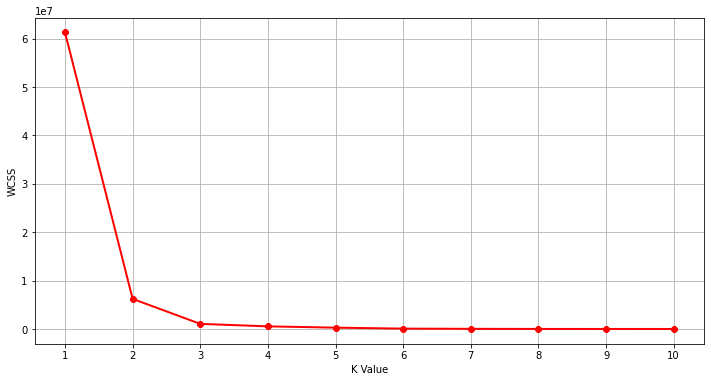

In [1380]:
#perform a k-means elbow test to determine how many clusters we should have
# two, however, seemed very low, so I went with 3 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_maybe.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [1381]:

# set number of clusters
kclusters = 3

clustering = df_maybe.drop('State', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 1, 0, 2, 0, 0])

In [1382]:
# add clustering labels
df_maybe.insert(0, 'Cluster Labels', kmeans.labels_)


In [1383]:
df_maybe.loc[df_maybe['Cluster Labels'] == 0, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,Alabama,0.000110,9.630000,0.410000,115.790000,0.294522,0
1,Alaska,0.000024,19.360000,0.590000,59.460000,0.338602,0
2,Arizona,0.000080,10.850000,1.840000,104.440000,0.374288,0
3,Arkansas,0.000121,7.780000,0.350000,118.750000,0.276729,0
6,Connecticut,0.000083,18.410000,2.020000,45.320000,0.409793,0
8,Florida,0.000092,10.310000,1.030000,98.080000,0.473793,0
9,Georgia,0.000648,9.620000,1.180000,122.640000,0.411381,0
10,Hawaii,0.000340,29.180000,2.590000,11.160000,0.577357,0
11,Idaho,0.000131,8.170000,0.770000,87.800000,0.571282,0
12,Illinois,0.000061,9.600000,1.200000,93.550000,0.322747,0


In [1384]:
df_maybe.loc[df_maybe['Cluster Labels'] == 1, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
5,Colorado,0.000241,10.020000,2.610000,66.240000,0.328761,5000


In [1386]:
#I call this the top 7, as they rank with Los Angeles, CA a city and the first state
# to declare bans on ICE cars in the future. 
# as such, these are the states I will normalize and rank according to 
#these metrics 
df_top7 = df_maybe.loc[df_maybe['Cluster Labels'] == 2, df_maybe.columns[[1,2,3,4] + list(range(5, df_maybe.shape[1]))]]
df_top7

,State,Chargers per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
4,California,0.000192,16.580000,7.840000,56.180000,0.580572,2500
7,Delaware,0.000467,10.550000,1.270000,47.670000,0.360380,2500
17,Louisiana,0.000045,7.710000,0.280000,86.670000,0.190216,3000
19,Maryland,0.000305,11.570000,1.910000,91.900000,0.472562,3000
31,New York,0.000039,14.830000,1.560000,51.460000,0.440393,2000
36,Oregon,0.000239,8.850000,3.410000,44.490000,0.533036,2500
46,Washington,0.000289,8.000000,4.280000,70.520000,0.575049,2500


In [1388]:
from sklearn import preprocessing

In [1389]:
#df_cluster3 = df_top7.drop(['State'], axis = 1,inplace = True )
#type(df_cluster3)

In [1390]:
#normalize the top7 dataframe to analyze more closely
df_cluster3 = df_top7.drop(['State'], axis = 1,)
x = df_cluster3.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [1392]:
# create new dataframe and rename columns for legibility
df_normalized.rename(columns={0: "Chargers Per Person", 1: "Average Electricity Ratefor All Sectors(Cents per Kilowatthour)", 
                              2:'EV Market Share (2018)',
                              3:'YoY Share % increase (2018/2017)',
                             4: '2018 Co2 Emissions from Transportation',
                             5: 'EV Rebate',
                             }, inplace = True)
df_normalized

,Chargers Per Person,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000


In [1394]:
#the next few cells involve inverting the score of the 
#electricity cost column, as a higher cost should lower the score
dfi = df_normalized['Average Electricity Ratefor All Sectors(Cents per Kilowatthour)']-[1] 
dfi

0    0.000000
1   -0.679820
2   -1.000000
3   -0.564825
4   -0.197294
5   -0.871477
6   -0.967306
Name: Average Electricity Ratefor All Sectors(Cents per Kilowatthour), dtype: float64

In [1395]:
dfii = dfi.abs()
dfiii = dfii.to_frame()
dfiii

,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,0.000000
1,0.679820
2,1.000000
3,0.564825
4,0.197294
5,0.871477
6,0.967306


In [1396]:
df_normalized.rename(columns={ "Average Electricity Ratefor All Sectors(Cents per Kilowatthour)":'Drop',
                             }, inplace = True)
df_normalized

,Chargers Per Person,Drop,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000


In [1397]:
df_final = pd.concat([df_normalized, dfiii], axis = 1)
df_final

,Chargers Per Person,Drop,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,0.358447,1.000000,1.000000,0.246572,1.000000,0.500000,0.000000
1,1.000000,0.320180,0.130952,0.067074,0.435920,0.500000,0.679820
2,0.015738,0.000000,0.000000,0.889686,0.000000,1.000000,1.000000
3,0.621754,0.435175,0.215608,1.000000,0.723303,1.000000,0.564825
4,0.000000,0.802706,0.169312,0.147015,0.640893,0.000000,0.197294
5,0.467461,0.128523,0.414021,0.000000,0.878224,0.500000,0.871477
6,0.585329,0.032694,0.529101,0.549040,0.985850,0.500000,0.967306


In [1398]:
#df_final.drop(['Average Electricity Ratefor All Sectors(Cents per Kilowatthour)'], axis = 1, inplace = True)
#df_final2 = pd.concat([df_final, dfiii])
#df_final2

In [1399]:
df_final2 = df_final
df_final2.drop(['Drop'], axis=1, inplace = True)

In [1401]:
# re-add the states for legibility
df_states = pd.DataFrame(['CA', 'DE','LA','MD', 'NY', 'OR', 'WA'],
                   columns=['State'])
df_states

,State
0,CA
1,DE
2,LA
3,MD
4,NY
5,OR
6,WA


In [1402]:
df_final_norm = pd.concat([df_states, df_final2], axis = 1)
#pd.options.display.float_format = '{:.2f}'.format
df_final_norm

,State,Chargers Per Person,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour)
0,CA,0.358447,1.000000,0.246572,1.000000,0.500000,0.000000
1,DE,1.000000,0.130952,0.067074,0.435920,0.500000,0.679820
2,LA,0.015738,0.000000,0.889686,0.000000,1.000000,1.000000
3,MD,0.621754,0.215608,1.000000,0.723303,1.000000,0.564825
4,NY,0.000000,0.169312,0.147015,0.640893,0.000000,0.197294
5,OR,0.467461,0.414021,0.000000,0.878224,0.500000,0.871477
6,WA,0.585329,0.529101,0.549040,0.985850,0.500000,0.967306


In [1404]:
# create a totals column to add up the scores
totals = df_final_norm.loc[:,'Row_Total'] = df_final_norm.sum(numeric_only=True, axis=1)
df_totals = totals.to_frame()
df_totals

,0
0,6.210038
1,5.627533
2,5.810847
3,8.250983
4,2.309029
5,6.262367
6,8.233250


In [1406]:
#add the total column and drop the redundant '0' column
df_final_3 = pd.concat([df_final_norm, df_totals], axis = 1)
df_final_3.drop([0], axis=1, inplace = True)

In [1407]:
df_final_3.sort_values(by=['Row_Total'], ascending = False)

,State,Chargers Per Person,EV Market Share (2018),YoY Share % increase (2018/2017),2018 Co2 Emissions from Transportation,EV Rebate,Average Electricity Ratefor All Sectors(Cents per Kilowatthour),Row_Total
3,MD,0.621754,0.215608,1.000000,0.723303,1.000000,0.564825,8.250983
6,WA,0.585329,0.529101,0.549040,0.985850,0.500000,0.967306,8.233250
5,OR,0.467461,0.414021,0.000000,0.878224,0.500000,0.871477,6.262367
0,CA,0.358447,1.000000,0.246572,1.000000,0.500000,0.000000,6.210038
2,LA,0.015738,0.000000,0.889686,0.000000,1.000000,1.000000,5.810847
1,DE,1.000000,0.130952,0.067074,0.435920,0.500000,0.679820,5.627533
4,NY,0.000000,0.169312,0.147015,0.640893,0.000000,0.197294,2.309029


## Winner: Baltimore, Maryland

Baltimore, Marlyland scored the highest out of the metrics we looked at, suggesting it is well-suited to declare a ban on ICEs, just like LA, NY and Seattle. Also, given this table, we can ascertain that Washinton is also likely to follow in California's footsteps and announce a state-wide ban as their most populous city ranks second in our testing, far above even Los Angeles. 

## This concludes Part 1. Thank you for reading. 

The code below is a rough draft for part two and will be removed in time. 

In [1157]:
address = 'Baltimore, MD'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Baltimore are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Baltimore are 39.2908816, -76.610759.


In [1158]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1160]:
df_chargers = pd.read_csv("C:/Users/Trevor/Desktop/balt_charge.csv")
df_chargers.head()

,Station Name,Street Address,City,State,ZIP,Latitude,Longitude
0,Municipal Garage,200 N Holliday St,Baltimore,MD,21202,39.291785,-76.610539
1,McHenry Row - Harris Teeter,1801 Whetstone Way,Baltimore,MD,21230,39.268940,-76.599600
2,UM PTS,5 North Paca Street,Baltimore,MD,21201,39.289413,-76.622039
3,UM PTS,622 W Fayette St,Baltimore,MD,21201,39.290765,-76.624390
4,UM PTS,646 W Pratt St,Baltimore,MD,21201,39.286345,-76.624966


In [1161]:
# create map and display it
m = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
m

In [1162]:
# instantiate a feature group for the incidents in the dataframe
chargers = folium.map.FeatureGroup()

# loop through the chargers and add each to the incidents feature group
for Latitude, Longitude, in zip(df_balt.Latitude, df_balt.Longitude):
    chargers.add_child(
        folium.features.CircleMarker(
            [Latitude, Longitude],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

    
# add incidents to map
m.add_child(chargers)

In [1163]:
CLIENT_ID = 'R5VQOYFWT4MVIFFZFMUPBOYGAEOVHC0IZRXH2O5YDD4JB3L0' # your Foursquare ID
CLIENT_SECRET = 'ZGVMUMZSEUDBOUZUQT4TXFNCYUK0CGSRY5YM4PN02VGXCXQ3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R5VQOYFWT4MVIFFZFMUPBOYGAEOVHC0IZRXH2O5YDD4JB3L0
CLIENT_SECRET:ZGVMUMZSEUDBOUZUQT4TXFNCYUK0CGSRY5YM4PN02VGXCXQ3


In [1164]:
balt_latitude = latitude # neighborhood latitude value
balt_longitude = longitude # neighborhood longitude value

neighborhood_name = 'Baltimore' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               balt_latitude, 
                                                               balt_longitude))

Latitude and longitude values of Baltimore are 39.2908816, -76.610759.


In [1292]:
radius = 10000 # define radius
LIMIT = 1000 # limit of number of venues returned by Foursquare API
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    balt_latitude, 
    balt_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=R5VQOYFWT4MVIFFZFMUPBOYGAEOVHC0IZRXH2O5YDD4JB3L0&client_secret=ZGVMUMZSEUDBOUZUQT4TXFNCYUK0CGSRY5YM4PN02VGXCXQ3&v=20180605&ll=39.2908816,-76.610759&radius=10000&limit=1000'

In [1293]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb9d90312d8516a986ab6f0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Baltimore',
  'headerFullLocation': 'Baltimore',
  'headerLocationGranularity': 'city',
  'totalResults': 233,
  'suggestedBounds': {'ne': {'lat': 39.38088169000009,
    'lng': -76.4946880727188},
   'sw': {'lat': 39.20088150999991, 'lng': -76.7268299272812}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adb2f51f964a520c12421e3',
       'name': "Baltimore Farmers' Market & Bazaar",
       'location': {'address': 'at E Saratoga St. & Holliday St.',
        'crossStreet': 'under the JFX',
        'lat': 39.293296518269045,
      

In [1294]:
# function that extracts the postal code of the venue
def get_postalCode(row):
    try:
        postalCode_list = row['postalCode']
    except:
        postalCode_list = row['venue.location.postalCode']
        
    if len(postalCode) == 0:
        return None
    else:
        return postalCode[0]['name']

In [1295]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.location.postalCode']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-1295-3c6275ae6669>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng,postalCode
0,Baltimore Farmers' Market & Bazaar,Farmers Market,39.293297,-76.610490,21202
1,Sotto Sopra,Italian Restaurant,39.294314,-76.615375,21201
2,Inner Harbor,Neighborhood,39.286590,-76.610704,21202
3,Center Club,Lounge,39.287194,-76.613959,21202
4,National Aquarium,Aquarium,39.285305,-76.608442,21202


In [1296]:
nearby_venues.shape

(100, 5)

In [1297]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            #v['venue']['location']['postalCode'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in 
                                  venues_list for item in venue_list])
    nearby_venues.columns = ['postalCode', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                            ]
    
    return(nearby_venues)

In [1298]:
balt_venues = getNearbyVenues(names=nearby_venues['postalCode'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng'],
                                  )

21202
21201
21202
21202
21202
21202
21201
21201
21202
21201
21201
21201
21202
21230
21202
21201
21202
21202
21202
21202
21201
21202
21201
21201
21202
21230
21201
21201
21202
21230
21231
21230
21202
21201
21201
nan
21202
21201
21202
21202
21202
21231
21231
21202
21201
21202
21231
21231
21202
21231
21231
21202
21201
21202
nan
21202
21231
21202
21231
21202
21231
21231
21202
21202
21201
21231
21231
21230
21230
21230
21231
21231
21230
21201
21223
21201
21231
21202
21230
21230
21231
21230
21230
21230
21202
21231
21231
21230
21231
21231
21201
21230
21231
21230
21230
21231
nan
21231
21231
21224


In [1311]:
balt_venues.head()

,postalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,21202,39.293297,-76.610490,Baltimore Farmers' Market & Bazaar,39.293297,-76.610490,Farmers Market
1,21202,39.293297,-76.610490,Ida B's Table,39.292654,-76.610420,Southern / Soul Food Restaurant
2,21202,39.293297,-76.610490,Black Sauce @ The Baltimore Farmers' Market,39.293335,-76.610681,Breakfast Spot
3,21202,39.293297,-76.610490,Sotto Sopra,39.294314,-76.615375,Italian Restaurant
4,21202,39.293297,-76.610490,Zeke's Coffee @ Baltimore Farmer's Market,39.293517,-76.609854,Coffee Shop


In [1312]:
balt_venues.groupby('postalCode').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
postalCode,,,,,,
21201,1410,1410,1410,1410,1410,1410
21202,2472,2472,2472,2472,2472,2472
21223,29,29,29,29,29,29
21224,56,56,56,56,56,56
21230,782,782,782,782,782,782
21231,1703,1703,1703,1703,1703,1703


In [1313]:
print('There are {} uniques categories.'.format(len(balt_venues['postalCode'].unique())))

There are 7 uniques categories.


In [1314]:
# one hot encoding
balt_onehot = pd.get_dummies(balt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
balt_onehot['ZIP'] = balt_venues['postalCode'] 

# move neighborhood column to the first column
fixed_columns = [balt_onehot.columns[-1]] + list(balt_onehot.columns[:-1])
balt_onehot = balt_onehot[fixed_columns]

balt_onehot.head()

,ZIP,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Cruise Ship,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,21202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1315]:
balt_onehot.shape

(6647, 215)

In [1316]:
balt_grouped = balt_onehot.groupby('ZIP').mean().reset_index()
balt_grouped

,ZIP,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Cruise Ship,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tourist Information Center,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,21201,0.009929,0.018440,0.006383,0.000000,0.000000,0.004255,0.008511,0.018440,0.000000,0.000000,0.000000,0.000000,0.004255,0.000000,0.019149,0.002837,0.027660,0.001418,0.000000,0.004965,0.000000,0.000709,0.002128,0.000000,0.000709,0.000709,0.000000,0.012766,0.000709,0.000000,0.009220,0.007092,0.000000,0.026950,0.000709,0.000000,0.009929,0.004965,0.000000,0.002837,0.009929,0.042553,0.007092,0.011348,0.018440,0.000709,0.000709,0.000000,0.000000,0.009929,0.000000,0.000000,0.025532,0.000000,0.000000,0.000000,0.000709,0.000000,0.001418,0.006383,0.009220,0.009220,0.007092,0.000000,0.000000,0.005674,0.000000,0.002128,0.003546,0.000000,0.008511,0.004965,0.000000,0.007092,0.000000,0.000000,0.007092,0.000000,0.002128,0.020567,0.000709,0.000000,0.000000,0.000000,0.007092,0.003546,0.011348,0.009220,0.000000,0.000000,0.005674,0.008511,0.000000,0.008511,0.015603,0.005674,0.003546,0.000000,0.023404,0.003546,0.002128,0.026950,0.000000,0.000000,0.014184,0.000000,0.001418,0.000000,0.000000,0.000709,0.009220,0.000000,0.001418,0.007801,0.000000,0.000709,0.009220,0.0

In [1317]:
balt_grouped.shape

(6, 215)

In [1318]:
num_top_venues = 5

for ZIP in balt_grouped['ZIP']:
    print("----"+ZIP+"----")
    temp = balt_grouped[balt_grouped['ZIP'] == ZIP].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----21201----
            venue     freq
0     Coffee Shop 0.040000
1  Sandwich Place 0.040000
2            Café 0.030000
3     Pizza Place 0.030000
4   Deli / Bodega 0.030000


----21202----
                 venue     freq
0   Italian Restaurant 0.070000
1                Hotel 0.050000
2   Seafood Restaurant 0.040000
3  American Restaurant 0.040000
4       Clothing Store 0.030000


----21223----
                 venue     freq
0  American Restaurant 0.070000
1          Coffee Shop 0.070000
2          Pizza Place 0.070000
3       History Museum 0.070000
4            Nightclub 0.030000


----21224----
                  venue     freq
0                   Bar 0.120000
1   American Restaurant 0.050000
2    Seafood Restaurant 0.050000
3           Pizza Place 0.040000
4  Gym / Fitness Center 0.040000


----21230----
                venue     freq
0                 Bar 0.110000
1         Coffee Shop 0.040000
2         Pizza Place 0.040000
3                Café 0.040000
4  Mexican Restaurant 0

In [1319]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1324]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZIP']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['ZIP'] = balt_grouped['ZIP']

for ind in np.arange(balt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(balt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,ZIP,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,21201,Coffee Shop,Sandwich Place,Pizza Place,Lounge,Bar,Café,Indian Restaurant,Theater,Deli / Bodega,Restaurant
1,21202,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue
2,21223,Pizza Place,American Restaurant,History Museum,Coffee Shop,Dance Studio,Peruvian Restaurant,Ethiopian Restaurant,Restaurant,Discount Store,Grocery Store
3,21224,Bar,American Restaurant,Seafood Restaurant,Mexican Restaurant,Convenience Store,Sushi Restaurant,Pizza Place,Gym / Fitness Center,Ice Cream Shop,Rental Car Location
4,21230,Bar,Pizza Place,Coffee Shop,Café,Park,Gym,Mexican Restaurant,Sushi Restaurant,Seafood Restaurant,Pub


In [1332]:
# set number of clusters
kclusters = 4

balt_grouped_clustering = balt_grouped.drop('ZIP', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(balt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 3, 0, 0])

In [1326]:
type(balt_data)

dict

In [1327]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

balt_merged = balt_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
balt_merged = balt_merged.join(neighborhoods_venues_sorted.set_index('ZIP'), on='postalCode')

#balt_merged.astype({'Cluster Labels': 'int32'}).dtypes

balt_merged.head() # check the last columns!

,postalCode,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,21202,39.293297,-76.610490,Baltimore Farmers' Market & Bazaar,39.293297,-76.610490,Farmers Market,2.000000,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue
1,21202,39.293297,-76.610490,Ida B's Table,39.292654,-76.610420,Southern / Soul Food Restaurant,2.000000,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue
2,21202,39.293297,-76.610490,Black Sauce @ The Baltimore Farmers' Market,39.293335,-76.610681,Breakfast Spot,2.000000,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue
3,21202,39.293297,-76.610490,Sotto Sopra,39.294314,-76.615375,Italian Restaurant,2.000000,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue
4,21202,39.293297,-76.610490,Zeke's Coffee @ Baltimore Farmer's Market,39.293517,-76.609854,Coffee Shop,2.000000,Italian Restaurant,Hotel,Seafood Restaurant,American Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Aquarium,Hotel Bar,Music Venue


In [1328]:
balt_merged.shape

(6647, 18)

In [1329]:
df_clusterlabels = balt_merged['Cluster Labels']
df_cl=df_clusterlabels.to_frame()
df_cl.dtypes

Cluster Labels    float64
dtype: object

In [1333]:
df_cl['Cluster Labels'] = df_cl['Cluster Labels'].astype(int) 
df_cl.head()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [1331]:
balt_merged_I = balt_merged.astype({"Cluster Labels": int})

#balt_merged_I = balt_merged.astype(int) 
balt_merged_I.head()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [1272]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(balt_merged['Venue Latitude'], balt_merged['Venue Longitude'], balt_merged['postalCode'], balt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

## BREAK HERE  HOPE IT WORKS

In [1184]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [1188]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name','venue.categories', 'venue.location.lat', 
                    'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-1188-8cb8fddfca75>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Ida B's Table,Southern / Soul Food Restaurant,39.292654,-76.610420
1,Baltimore Farmers' Market & Bazaar,Farmers Market,39.293297,-76.610490
2,Larry Flynt's Hustler Club,Strip Club,39.289615,-76.609833
3,Chez Hugo,French Restaurant,39.289108,-76.611811
4,The Alexander Brown,American Restaurant,39.289452,-76.612434


In [1196]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

58 venues were returned by Foursquare.


In [1192]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Category', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1193]:
balt_venues = getNearbyVenues(names=nearby_venues['categories'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )

Southern / Soul Food Restaurant
Farmers Market
Strip Club
French Restaurant
American Restaurant
Salon / Barbershop
Hotel
Theater
Breakfast Spot
Concert Hall
Clothing Store
Food Truck
Hotel
Neighborhood
Café
Deli / Bodega
Fast Food Restaurant
Lounge
Church
Café
Plaza
Burger Joint
Salad Place
Middle Eastern Restaurant
Sandwich Place
Coffee Shop
American Restaurant
American Restaurant
Salad Place
Monument / Landmark
Mediterranean Restaurant
BBQ Joint
New American Restaurant
Bar
Peruvian Restaurant
Coffee Shop
Non-Profit
Music Venue
Tourist Information Center
Music Venue
Cosmetics Shop
Hotel Bar
Lingerie Store
Vietnamese Restaurant
Lounge
Bar
Coffee Shop
Clothing Store
Coffee Shop
Pharmacy
Jewelry Store
Supplement Shop
Boutique
Kids Store
American Restaurant
Convenience Store
Bus Stop
Convenience Store


In [1225]:
print('There are {} uniques categories.'.format(len(balt_venues['Venue Category'].unique())))

There are 117 uniques categories.


In [1195]:
print(balt_venues.shape)
balt_venues.head()

(4663, 7)


,Category,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Southern / Soul Food Restaurant,39.292654,-76.610420,Baltimore Farmers' Market & Bazaar,39.293297,-76.610490,Farmers Market
1,Southern / Soul Food Restaurant,39.292654,-76.610420,Ida B's Table,39.292654,-76.610420,Southern / Soul Food Restaurant
2,Southern / Soul Food Restaurant,39.292654,-76.610420,Black Sauce @ The Baltimore Farmers' Market,39.293335,-76.610681,Breakfast Spot
3,Southern / Soul Food Restaurant,39.292654,-76.610420,Larry Flynt's Hustler Club,39.289615,-76.609833,Strip Club
4,Southern / Soul Food Restaurant,39.292654,-76.610420,Zeke's Coffee @ Baltimore Farmer's Market,39.293517,-76.609854,Coffee Shop


In [ ]:
balt_venues.drop(['Category'], axis = 1, inplace = True)

In [1145]:
balt_venues.groupby('Venue Category').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,
Afghan Restaurant,26,26,26,26,26
American Restaurant,207,207,207,207,207
Aquarium,95,95,95,95,95
Art Gallery,15,15,15,15,15
Art Museum,7,7,7,7,7
Asian Restaurant,7,7,7,7,7
Athletics & Sports,5,5,5,5,5
BBQ Joint,27,27,27,27,27
Bakery,41,41,41,41,41


In [1152]:
balt_grouped = df_chargers.groupby('ZIP').mean().reset_index()
balt_grouped

,ZIP,Latitude,Longitude
0,21201,39.291508,-76.618940
1,21202,39.288763,-76.607646
2,21205,39.299550,-76.581808
3,21206,39.358460,-76.536562
4,21207,39.311106,-76.717860
5,21209,39.368577,-76.661122
6,21210,39.355737,-76.635104
7,21211,39.329567,-76.625668
8,21212,39.359161,-76.612913
9,21213,39.311570,-76.587275
